In [8]:
from optiwindnet.api import WindFarmNetwork, HGSRouter, load_repository
import optiwindnet.repair as repair
from optiwindnet.interarraylib import calcload

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

In [3]:
import numpy as np
import networkx as nx
def get_LA():
    substationsC = np.array([[0, 0],], dtype=float)
    turbinesC = np.array(
        [[0, 1], [0, 2], [1, 2], [2, 2],
        [2, 1], [2, 0], [1, 0], [1, 1],
        ],
        dtype=float)
    wfn = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=5)
    return wfn.L, wfn.A



def create_S(edges) -> nx.Graph:
    """
    Build a rooted, non-branching solution graph S
    """
    S, _ = get_LA()


    # --- add the edges
    S.add_edges_from(edges)
    calcload(S)

    return S

In [17]:
edges = [(-1, 0), (0, 7), (7, 3), (3, 4), (-1, 6), (6, 5), (5, 2), (2, 1)]
S = create_S(edges=edges)
_, A = get_LA()
S_repaired = repair.repair_routeset_path(S, A)

In [18]:
S.edges()

EdgeView([(0, -1), (0, 7), (1, 2), (2, 5), (3, 7), (3, 4), (5, 6), (6, -1)])

In [19]:
S_repaired.edges()

EdgeView([(0, -1), (0, 7), (1, 2), (2, 5), (3, 7), (3, 4), (5, 6), (6, -1)])

In [15]:
L, A = get_LA()

In [16]:
L.graph.keys()

dict_keys(['T', 'R', 'VertexC', 'B', 'obstacles', 'name', 'handle'])

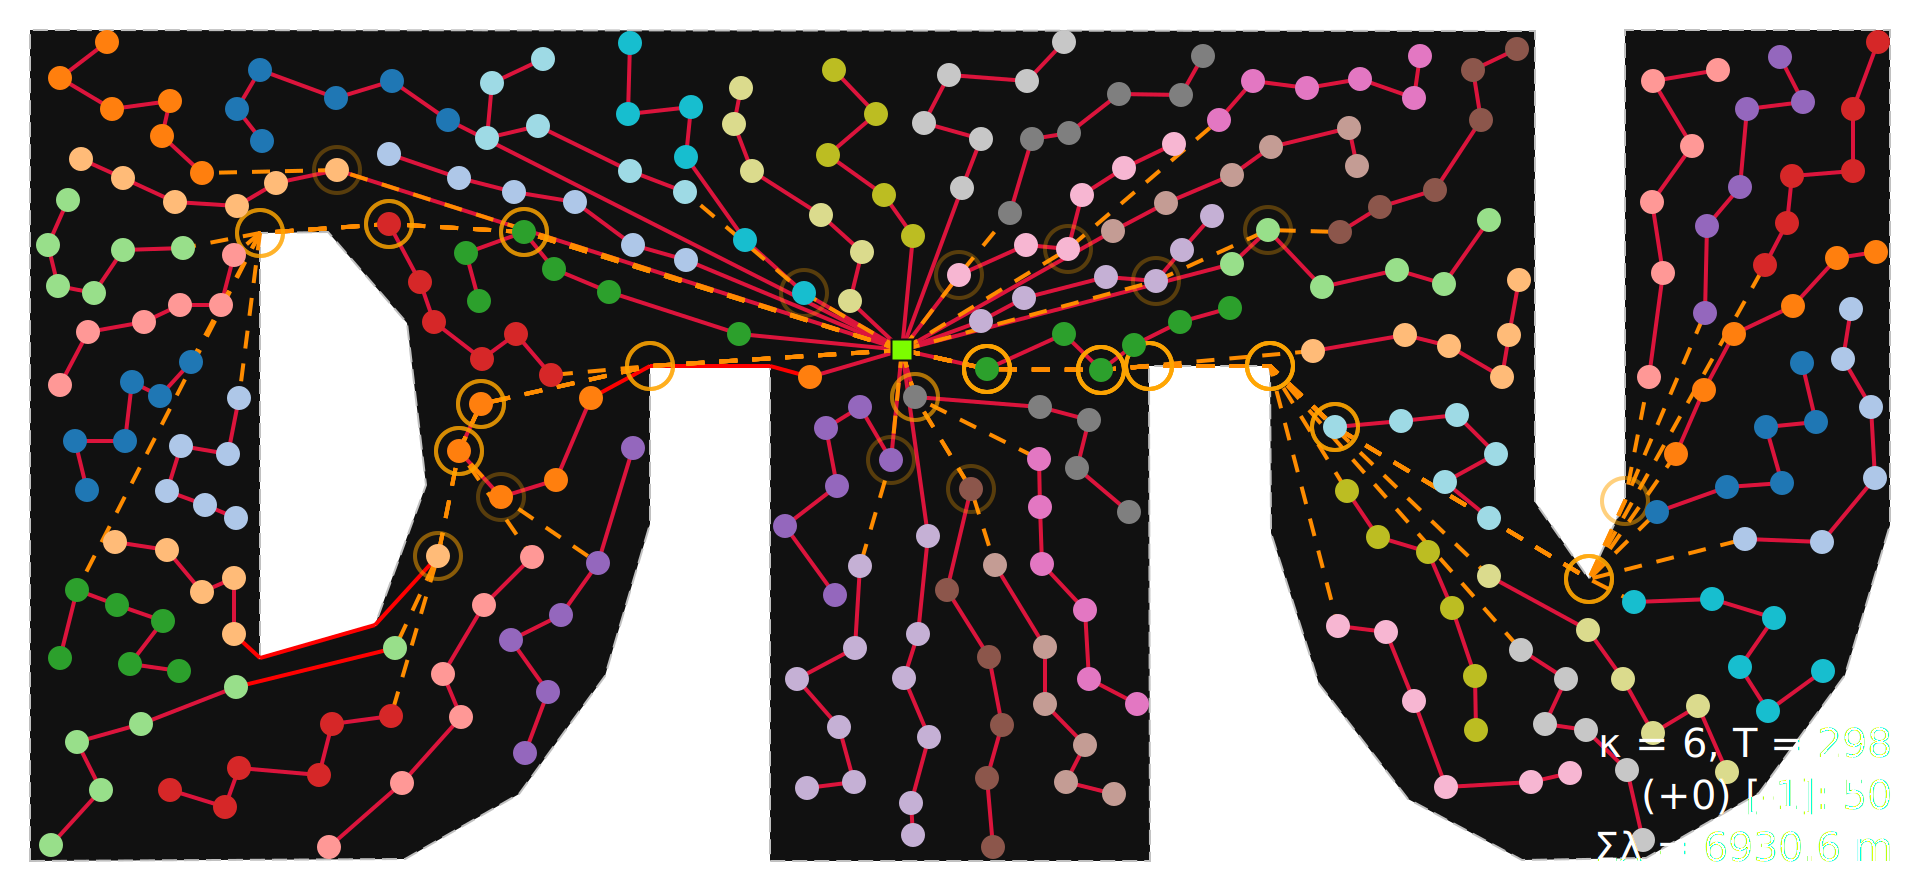

In [ ]:
wfn

In [ ]:
print(wfn.S.graph['solution_time'])

19.74


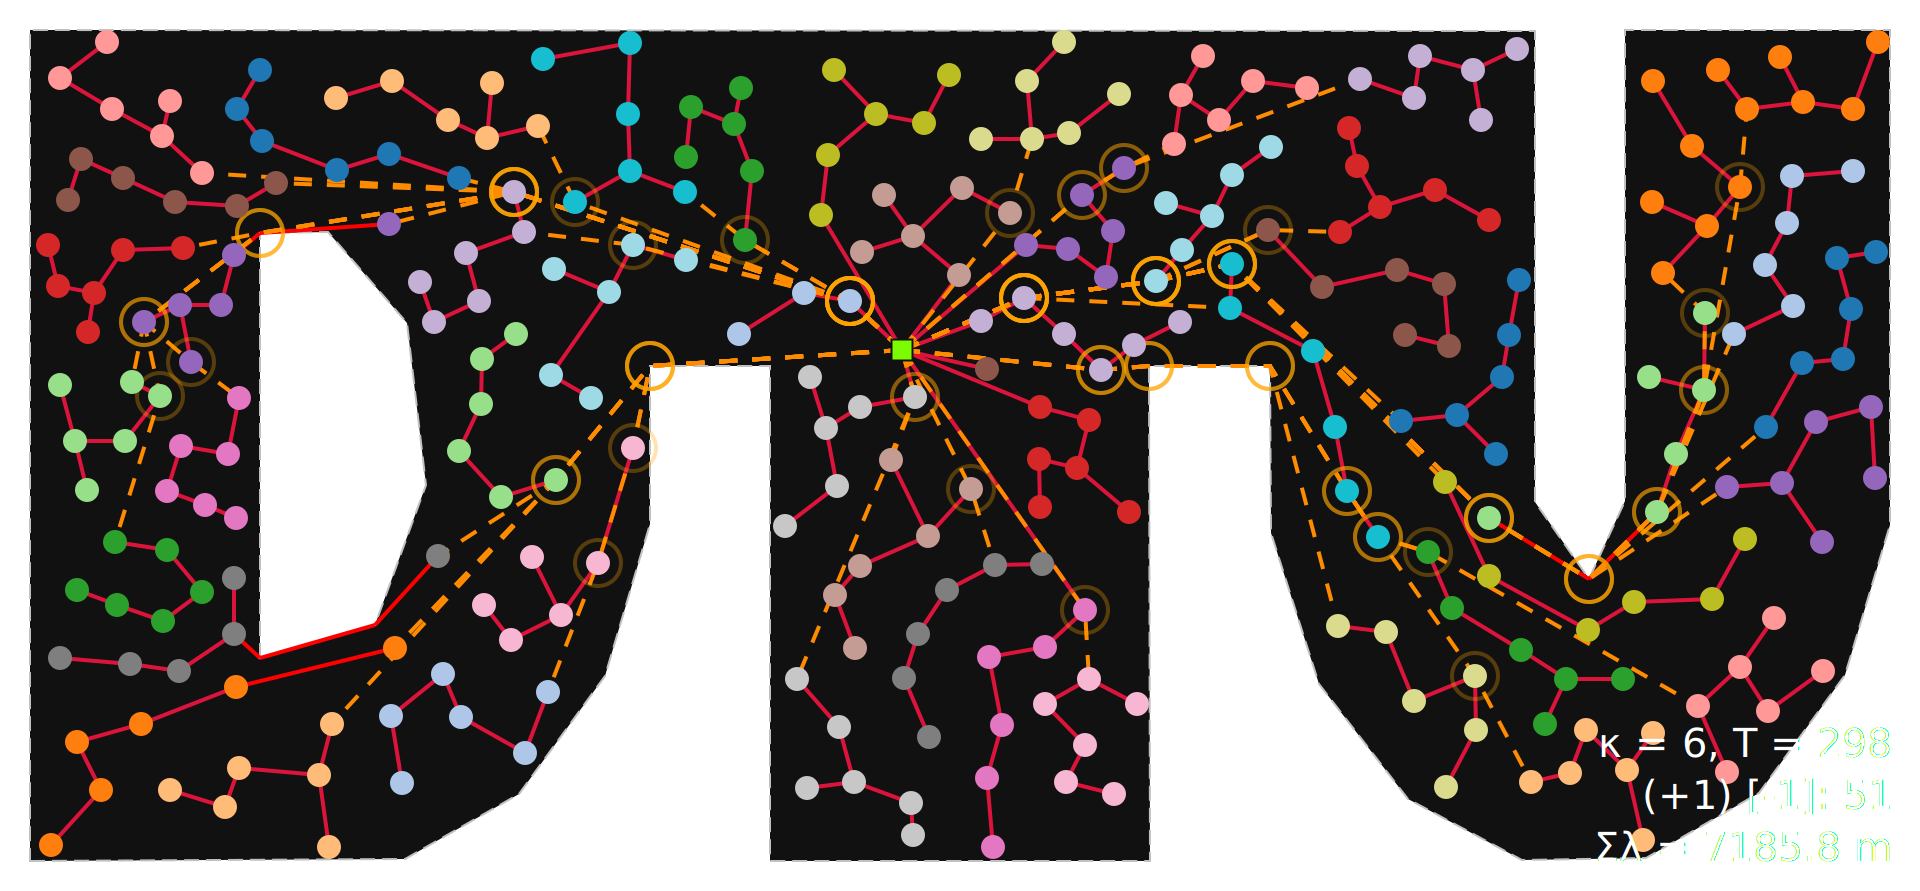

In [ ]:
from optiwindnet.api import EWRouter
res = wfn.optimize(router=EWRouter())
wfn

In [22]:
locations = load_repository(path=r'C:\code\OptiWindNet\tests\test_files')

In [23]:
len(locations), ', '.join(locations._fields)

(11,
 'cazzaro_2022G210, example_location, hornsea, london, taylor_2023, yi_2019, albatros, eagle, dtu_1ss_10wt, kfA, riffgat')

In [28]:
wfn = WindFarmNetwork(L=locations.riffgat, cables=7)

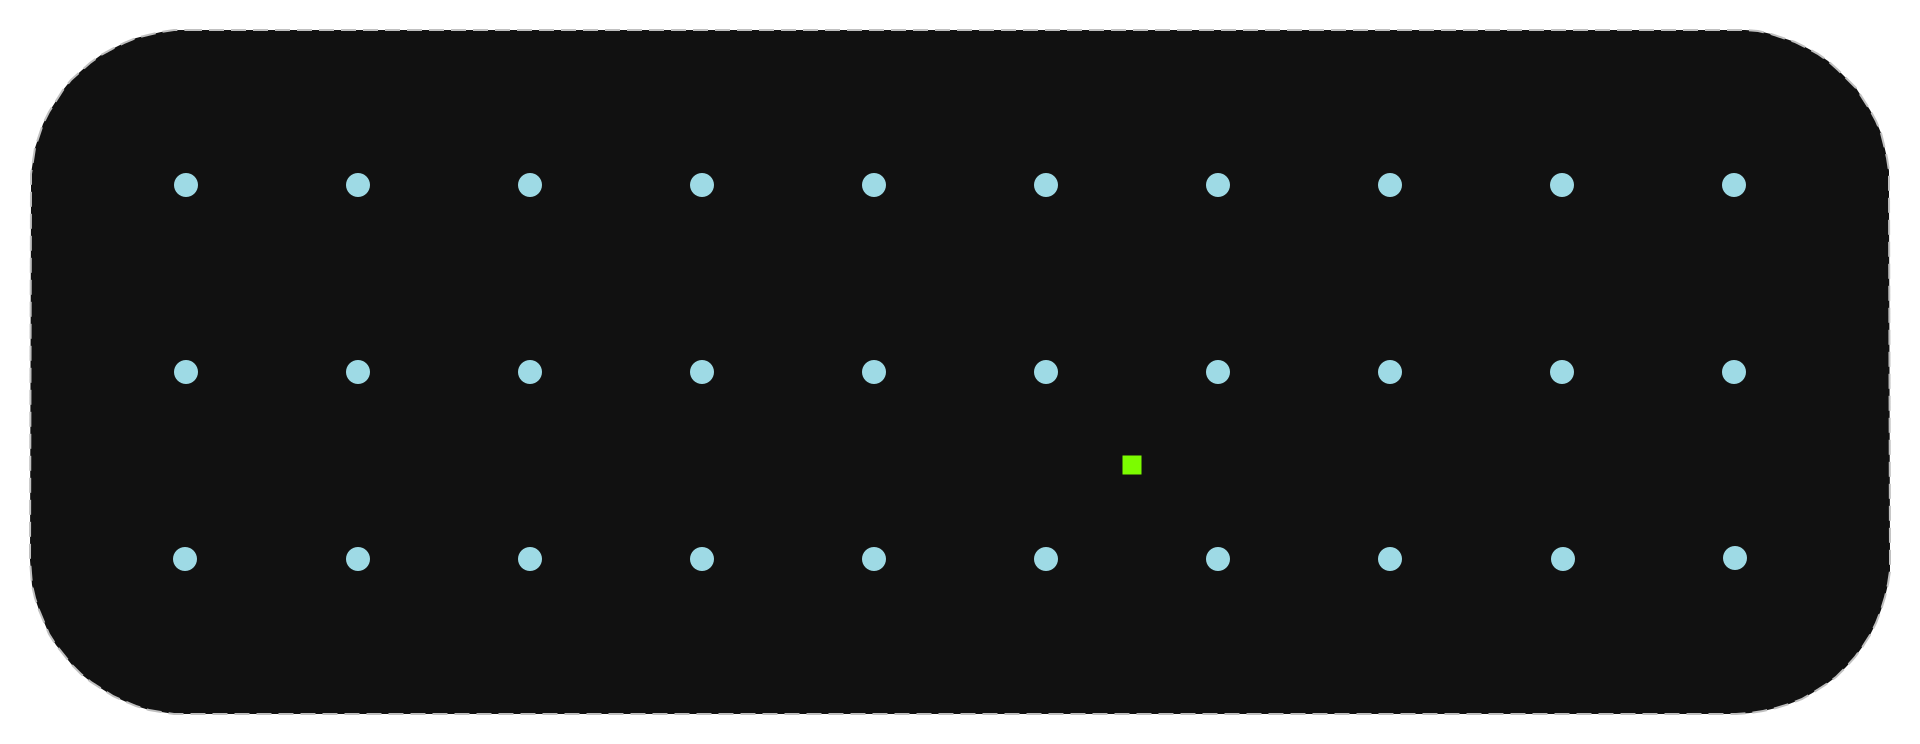

In [29]:
wfn